In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [106]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\Apple\\AAPL(ClosingVal-today).csv")

In [107]:
df.head()

Date      Open      High       Low      Volume     Close
0  1/2/1998  0.121652  0.145089  0.120536   718110400  0.145089
1  1/5/1998  0.147321  0.147879  0.135603   651873600  0.141741
2  1/6/1998  0.142299  0.178571  0.131696  1812473600  0.169085
3  1/7/1998  0.167969  0.169643  0.154576  1041622400  0.156250
4  1/8/1998  0.155692  0.166295  0.151228   774020800  0.162388

In [108]:
df.tail()

Date        Open        High         Low     Volume       Close
5840  3/19/2021  119.900002  121.430000  119.680000  185023200  119.989998
5841  3/22/2021  120.330002  123.870003  120.260002  111912300  123.389999
5842  3/23/2021  123.330002  124.239998  122.139999   95467100  122.540001
5843  3/24/2021  122.820000  122.900002  120.070000   88530500  120.089996
5844  3/25/2021  119.540001  121.660004  119.000000   98696600  120.589996

In [109]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [110]:
df.shape

(5845, 6)

In [111]:
del df['Date']

In [112]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [113]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
xtrain.shape

(4676, 4)

In [115]:
ytrain.shape

(4676,)

In [116]:
xtest.shape

(1169, 4)

In [117]:
ytest.shape

(1169,)

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [120]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([112.95957334,  90.942024  ,   3.33995006, ..., 114.77217375,
        24.97112562,   0.2474524 ])

In [121]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [122]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))

Mean Absolute Error: 0.13758844655260952
Mean Squared Error: 0.15056063362824906
Root Mean Squared Error: 0.38802143449589105
Mean Directional Accuracy: 0.997431506849315


### Predicting for 6th April

In [123]:
rf.predict([[126.5,127.13,125.65,79463200]])

array([126.40354952])

### Graph

In [124]:
import matplotlib.pyplot as plt

In [130]:
newdf=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\Apple\\Apple(DataFrom26March)-Today.csv")

In [131]:
newdf.head()

Date        Open        High         Low     Volume       Close
0  26-Mar-21  120.349998  121.480003  118.919998   93958900  121.209999
1  29-Mar-21  121.650002  122.580002  120.730003   80819200  121.389999
2  30-Mar-21  120.110001  120.400002  118.860001   85671900  119.900002
3  31-Mar-21  121.650002  123.519997  121.150002  118323800  122.150002
4   1-Apr-21  123.660004  124.180000  122.489998   74957400  123.000000

In [132]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [133]:
predictions = rf.predict(newxval)

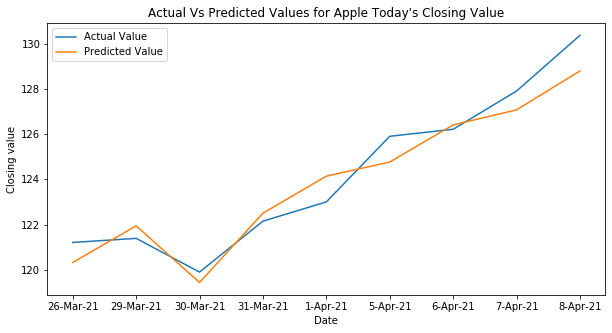

In [134]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Today's Closing Value")
plt.legend()